<a href="https://colab.research.google.com/github/wiv33/A-Learning-python/blob/master/machine-learning/_000_hello_machine/_000_basic/_004_multi_camp/_003_SVM_%EC%88%AB%EC%9E%90_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

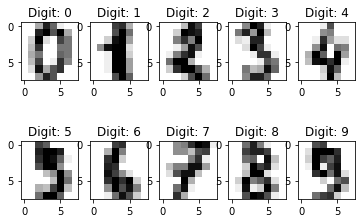

In [4]:
import matplotlib.pyplot as plt
import random
from sklearn import datasets, tree, svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

digits = datasets.load_digits()

# 이미지 표시

for label, img in zip(digits.target[:10], digits.images[:10]):
  plt.subplot(2, 5, label + 1)
  plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
  plt.title('Digit: {0}'.format(label))

plt.show()

In [5]:
img, img.shape, label

(array([[ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.],
        [ 0.,  2., 16., 16., 16., 13.,  0.,  0.],
        [ 0.,  3., 16., 12., 10., 14.,  0.,  0.],
        [ 0.,  1., 16.,  1., 12., 15.,  0.,  0.],
        [ 0.,  0., 13., 16.,  9., 15.,  2.,  0.],
        [ 0.,  0.,  0.,  3.,  0.,  9., 11.,  0.],
        [ 0.,  0.,  0.,  0.,  9., 15.,  4.,  0.],
        [ 0.,  0.,  9., 12., 13.,  3.,  0.,  0.]]), (8, 8), 9)

In [6]:
images = digits.images
labels = digits.target

#  차원을 하나 줄인다.
images = images.reshape(images.shape[0], -1)

 # 서포트 벡터 머신 모델을 생성한다.

n_samples = len(images)
train_size = int(n_samples * 2 / 3)


classifier = svm.SVC(1.0, gamma=0.001)
classifier.fit(images[:train_size], labels[:train_size])

# 모델의 성능을 확인한다.
expected = labels[train_size:]
predicted = classifier.predict(images[train_size:])

print('Accuracy: \n', accuracy_score(expected, predicted))

print('Confusion matrix: \n', confusion_matrix(expected, predicted))

Accuracy: 
 0.9632721202003339
Confusion matrix: 
 [[58  0  0  0  1  0  0  0  0  0]
 [ 0 62  0  0  0  0  0  0  0  0]
 [ 0  0 59  1  0  0  0  0  0  0]
 [ 0  0  0 50  0  2  0  3  7  0]
 [ 0  0  0  0 59  0  0  0  0  3]
 [ 0  0  0  0  0 58  1  0  0  0]
 [ 0  1  0  0  0  0 60  0  0  0]
 [ 0  0  0  0  0  0  0 61  0  0]
 [ 0  1  0  0  0  0  0  0 54  0]
 [ 0  0  0  1  0  1  0  0  0 56]]


In [7]:
digits

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

In [8]:
expected

array([4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3,
       3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2,
       1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6,
       1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9,
       8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0,
       1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1,
       7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4,
       6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7,
       4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7,
       5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5,
       1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4,
       9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3,

In [9]:
predicted

array([4, 1, 7, 7, 8, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3,
       3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2,
       1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6,
       1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9,
       8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0,
       1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1,
       7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4,
       6, 6, 6, 4, 9, 1, 5, 0, 9, 6, 2, 8, 3, 0, 0, 1, 7, 6, 3, 2, 1, 7,
       4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7,
       5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5,
       1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4,
       9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3,